<a href="https://colab.research.google.com/github/leogalbu/Colab_Notebook/blob/Image_Classification/Food_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recupero il dataset

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-08-26 12:49:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 142.250.107.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   183MB/s    in 0.6s    

2022-08-26 12:49:42 (183 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [4]:
!ls pizza_steak

test  train


In [6]:
!ls pizza_steak/train/

pizza  steak


In [8]:
#!ls pizza_steak/train/steak

In [9]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are  {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are  2 directories and 0 images in 'pizza_steak'.
There are  2 directories and 0 images in 'pizza_steak/train'.
There are  0 directories and 750 images in 'pizza_steak/train/pizza'.
There are  0 directories and 750 images in 'pizza_steak/train/steak'.
There are  2 directories and 0 images in 'pizza_steak/test'.
There are  0 directories and 250 images in 'pizza_steak/test/pizza'.
There are  0 directories and 250 images in 'pizza_steak/test/steak'.


In [12]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [17]:
# Get the classnames

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
print(data_dir.glob('*'))
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

<generator object Path.glob at 0x7f3e46b0e550>
['pizza' 'steak']


In [28]:
# Visualize Images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set the target directory
  target_folder = target_dir + "/" + target_class
  # get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  # Read and plot the image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['3830773.jpg']
Image shape: (512, 512, 3)


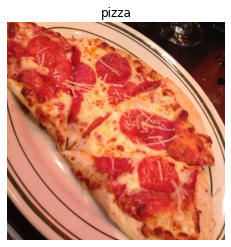

In [29]:
img = view_random_image("pizza_steak/train", "pizza")

['482022.jpg']
Image shape: (512, 512, 3)


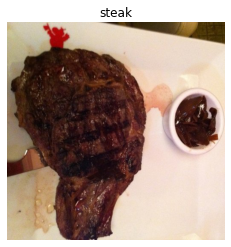

In [32]:
img = view_random_image("pizza_steak/train", "steak")

In [34]:
# View the image shape

img.shape # width height, colour channels

(512, 512, 3)

In [ ]:
# Normalize the pixel values (tra 0 e 1)
